### How to run Metrcs on DDF or areas that are outside WFD and DDF

In [1]:
import os
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To calculate metrics with MAF
import lsst.sims.maf.db as db
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

### ProposalId
To run metrics on DDF or areas outside DDF and WFD, we need to set the `proposalId` in the sql contraint. In short, if running metric on DDFs only, `proposalId > 1`; if running metrics in areas outside DDF and WDF, `proposalId = 0`. We get all also run WFD only metrics using `proposalId = 1`, but a more sophisticated methods is shown in [wfdFootPrint.ipynb](./wfdFootPrint.ipynb). More discussion regarding running metrics on WFD observations only can be found in this [thread](https://community.lsst.org/t/wfd-metrics-with-the-fbs-output/3970).

The area associated with each `proposalId` is shown below:  
```sql
proposalId  proposalName  proposalType
----------  ------------  ------------
0           Other         Other
1           WFD           WFD
2           DD:COSMOS     DD
3           DD:ECDFS      DD
4           DD:290        DD
5           DD:XMM-LSS    DD
6           DD:ELAISS1    DD
```

Next, we demonstrat how to run metrics on DDF only and on areas outside DDF and WFD.

In [4]:
# specify path to the opsim database and create database object
dbfile = '/home/idies/workspace/lsst_cadence/FBS_1.4/baseline_v1.4_10yrs.db'
outDir = '../tmp/'
opsdb = db.OpsimDatabase(dbfile)

In [5]:
# Let's count the visits .. 
metric = metrics.CountMetric('observationStartMJD', metricName='nvisits')
slicer = slicers.HealpixSlicer(nside=64)
constraint = 'filter = "g"'

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


### 1. Compute Metrics on DDF only

In [10]:
# specify proposal ID use compute metric on DDF only
ddf_constraint = constraint + ' and proposalId > 1'

# create metric Bundle
ddf_bundle = mb.MetricBundle(metric, slicer, ddf_constraint, metadata='DDF only')

Querying database SummaryAllProps with constraint filter = "g" and proposalId > 1 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 20554 visits
Running:  ['0']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" and proposalId > 1" constraint now.
monopole: 2043.01  dipole: lon: 123.417, lat: -25.3882, amp: 239.397
Plotting complete.


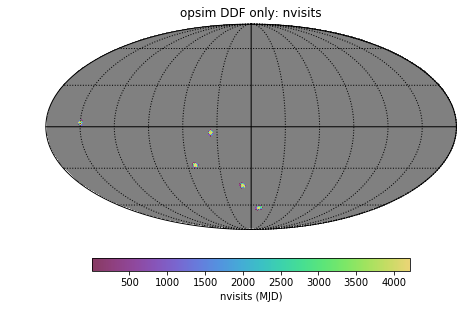

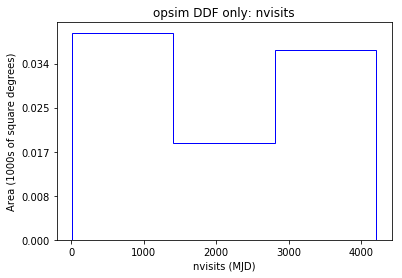

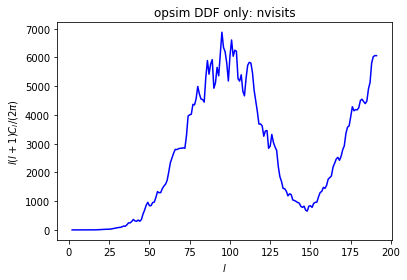

In [11]:
ddf_g = mb.MetricBundleGroup({'0': ddf_bundle}, opsdb, outDir=outDir)
ddf_g.runAll()
ddf_g.plotAll(closefigs=False, savefig=False)

### 2. Compute Metrics on areas outside DDF and WFD

In [17]:
# specify proposal ID use compute metric on DDF only
other_constraint = constraint + ' and proposalId = 0'

# create metric Bundle
other_bundle = mb.MetricBundle(metric, slicer, other_constraint, metadata='Other')

Querying database SummaryAllProps with constraint filter = "g" and proposalId = 0 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 32672 visits
Running:  ['0']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "g" and proposalId = 0" constraint now.
monopole: 30.5516  dipole: lon: 92.6507, lat: -34.5725, amp: 6.18194
Plotting complete.


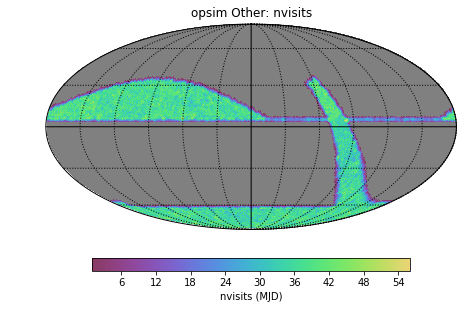

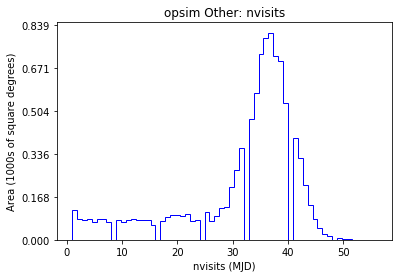

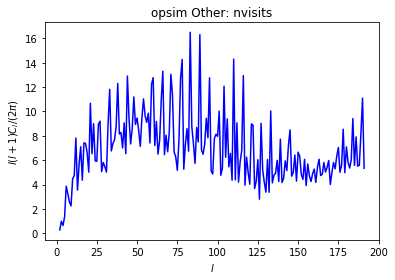

In [18]:
other_g = mb.MetricBundleGroup({'0': other_bundle}, opsdb, outDir=outDir)
other_g.runAll()
other_g.plotAll(closefigs=False, savefig=False)